In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sys
sys.path.append(r'\Users\Mochi\AppData\Local\Programs\Python\Python310\Lib\site-packages')
import quads
import numpy as np

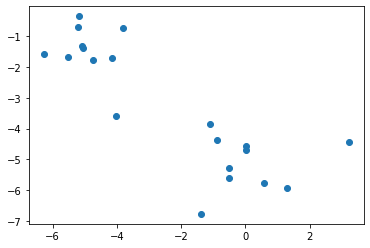

In [6]:
X, y = make_blobs(n_samples=20, centers=2, n_features=2,random_state=50)
plt.scatter(X[:,0], X[:,1])

In [7]:
mid_X = (np.amax(X[:,0], axis=0) - np.amin(X[:,0], axis=0))/2
mid_y = (np.amax(X[:,1], axis=0) - np.amin(X[:,1], axis=0))/2
print(mid_X, mid_y)

4.732805724708723 3.2016611612870562


In [8]:
tree = quads.QuadTree(
    (0,0),  # The center point
    25,  # The width
    25,  # The height
 )
for i in range(X.shape[0]):
    tree.insert(quads.Point(X[i,0], X[i,1]))

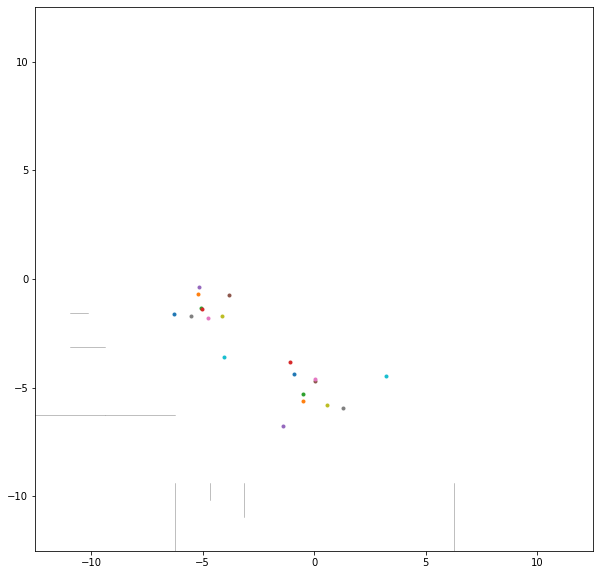

In [9]:
quads.visualize(tree)

In [10]:
children = tree._root.all_points()
children

[<Point: (-6.259503193144937, -1.586974178024632)>,
 <Point: (-5.205232005797686, -0.7001206365778478)>,
 <Point: (-5.090937840058423, -1.330363745285566)>,
 <Point: (-5.0402881638325585, -1.3830950874267471)>,
 <Point: (-5.1717835174633215, -0.36249448946735807)>,
 <Point: (-3.795312012496008, -0.734993102327355)>,
 <Point: (-4.7509900500902535, -1.7879324368798895)>,
 <Point: (-5.514938688712358, -1.69764780809234)>,
 <Point: (-4.13699984527692, -1.7099372119772382)>,
 <Point: (-4.033159567620958, -3.5795910917441205)>,
 <Point: (-0.88843630313622, -4.368070175866921)>,
 <Point: (-0.5202015420369128, -5.5990529720241575)>,
 <Point: (-0.5019229399608265, -5.29022209324418)>,
 <Point: (-1.105493153525105, -3.839429617118596)>,
 <Point: (-1.3902596851290878, -6.765816812041471)>,
 <Point: (0.01589916825431556, -4.695552518057381)>,
 <Point: (0.018370550347881792, -4.576144195559073)>,
 <Point: (1.3039790325473009, -5.915070054491227)>,
 <Point: (0.5887698746701778, -5.772903095908645)>,

In [11]:
for child in children:
    node, searched_nodes =  tree._root.find_node(child)
    print("node: ", node)
    print(node.all_points())
   ## print(searched_nodes)

node:  <QuadNode: (-9.375, -3.125) 6.25x6.25>
[<Point: (-6.259503193144937, -1.586974178024632)>]
node:  <QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>
[<Point: (-5.205232005797686, -0.7001206365778478)>, <Point: (-5.090937840058423, -1.330363745285566)>, <Point: (-5.0402881638325585, -1.3830950874267471)>, <Point: (-5.1717835174633215, -0.36249448946735807)>]
node:  <QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>
[<Point: (-5.205232005797686, -0.7001206365778478)>, <Point: (-5.090937840058423, -1.330363745285566)>, <Point: (-5.0402881638325585, -1.3830950874267471)>, <Point: (-5.1717835174633215, -0.36249448946735807)>]
node:  <QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>
[<Point: (-5.205232005797686, -0.7001206365778478)>, <Point: (-5.090937840058423, -1.330363745285566)>, <Point: (-5.0402881638325585, -1.3830950874267471)>, <Point: (-5.1717835174633215, -0.36249448946735807)>]
node:  <QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>
[<Point: (-5.205232005797686, -0.7001206365778478)>, 

In [10]:
tree._root.ll.all_points()

[<Point: (-6.259503193144937, -1.586974178024632)>,
 <Point: (-5.205232005797686, -0.7001206365778478)>,
 <Point: (-5.090937840058423, -1.330363745285566)>,
 <Point: (-5.0402881638325585, -1.3830950874267471)>,
 <Point: (-5.1717835174633215, -0.36249448946735807)>,
 <Point: (-3.795312012496008, -0.734993102327355)>,
 <Point: (-4.7509900500902535, -1.7879324368798895)>,
 <Point: (-5.514938688712358, -1.69764780809234)>,
 <Point: (-4.13699984527692, -1.7099372119772382)>,
 <Point: (-4.033159567620958, -3.5795910917441205)>,
 <Point: (-0.88843630313622, -4.368070175866921)>,
 <Point: (-0.5202015420369128, -5.5990529720241575)>,
 <Point: (-0.5019229399608265, -5.29022209324418)>,
 <Point: (-1.105493153525105, -3.839429617118596)>,
 <Point: (-1.3902596851290878, -6.765816812041471)>]

In [11]:
tree._root.ll

<QuadNode: (-6.25, -6.25) 12.5x12.5>

In [12]:
tree._root.lr.all_points()

[<Point: (0.01589916825431556, -4.695552518057381)>,
 <Point: (0.018370550347881792, -4.576144195559073)>,
 <Point: (1.3039790325473009, -5.915070054491227)>,
 <Point: (0.5887698746701778, -5.772903095908645)>,
 <Point: (3.206108256272509, -4.450567449977902)>]

In [25]:
tree._root.ll.find_node(tree._root.ll.all_points()[4])

(<QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>,
 [<QuadNode: (-6.25, -6.25) 12.5x12.5>,
  <QuadNode: (-3.125, -3.125) 6.25x6.25>,
  <QuadNode: (-4.6875, -1.5625) 3.125x3.125>,
  <QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>])

In [14]:
tree._root.lr.ul.all_points()

[<Point: (0.01589916825431556, -4.695552518057381)>,
 <Point: (0.018370550347881792, -4.576144195559073)>,
 <Point: (1.3039790325473009, -5.915070054491227)>,
 <Point: (0.5887698746701778, -5.772903095908645)>,
 <Point: (3.206108256272509, -4.450567449977902)>]

In [44]:
type(tree._root.ll.all_points()[4].x)

numpy.float64

In [15]:
children = tree._root.all_points() ##number of childern in root node

In [16]:
len(children)

20

In [17]:
c = next(it)

NameError: name 'it' is not defined

In [34]:

def Number_Of_Nodes(node):
    count = 0
    print("node: ", node)
    if node.ul is not None:
        
        if len(node.ul.all_points()) > 0:
                        count+=1
                        ##print("node: ", node)
                        ##print("ul node: ", node.ul)
                        count += Number_Of_Nodes(node.ul)
                        
        if len(node.ur.all_points()) > 0:
                        count+=1
                        ##print("node: ", node)
                        ##print("ur node: ", node.ur)
                        count += Number_Of_Nodes(node.ur)
                        
        if len(node.ll.all_points()) > 0:
                        count+=1
                        ##print("node: ", node)
                        ##print("ll node: ", node.ll)
                        count += Number_Of_Nodes(node.ll)
                        
        if len(node.lr.all_points()) > 0:
                        count+=1
                        ##print("node: ", node)
                        ##print("lr node: ", node.lr)
                        count += Number_Of_Nodes(node.lr)
                          
    return count

In [35]:
Number_Of_Nodes(tree._root)

node:  <QuadNode: (0, 0) 25x25>
node:  <QuadNode: (0, 0) 25x25>
ll node:  <QuadNode: (-6.25, -6.25) 12.5x12.5>
node:  <QuadNode: (-6.25, -6.25) 12.5x12.5>
node:  <QuadNode: (-6.25, -6.25) 12.5x12.5>
ul node:  <QuadNode: (-9.375, -3.125) 6.25x6.25>
node:  <QuadNode: (-9.375, -3.125) 6.25x6.25>
node:  <QuadNode: (-6.25, -6.25) 12.5x12.5>
ur node:  <QuadNode: (-3.125, -3.125) 6.25x6.25>
node:  <QuadNode: (-3.125, -3.125) 6.25x6.25>
node:  <QuadNode: (-3.125, -3.125) 6.25x6.25>
ul node:  <QuadNode: (-4.6875, -1.5625) 3.125x3.125>
node:  <QuadNode: (-4.6875, -1.5625) 3.125x3.125>
node:  <QuadNode: (-4.6875, -1.5625) 3.125x3.125>
ul node:  <QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>
node:  <QuadNode: (-5.46875, -0.78125) 1.5625x1.5625>
node:  <QuadNode: (-4.6875, -1.5625) 3.125x3.125>
ur node:  <QuadNode: (-3.90625, -0.78125) 1.5625x1.5625>
node:  <QuadNode: (-3.90625, -0.78125) 1.5625x1.5625>
node:  <QuadNode: (-4.6875, -1.5625) 3.125x3.125>
ll node:  <QuadNode: (-5.46875, -2.34375) 1.56

15

In [50]:
def Compute_Diam(node):
    if len(node.all_points()) > 1:
        return node.width
    else:
        return 0   

In [ ]:
## referenced at https://stackoverflow.com/questions/12472338/flattening-a-list-recursively
def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])

In [82]:
def WSPD(node_u, node_v, epsilon):
    """
    tree : QuadTree type
    
    Returns:
    WSDP_Pair : list of WSDP pairs
    """
    pairs = []
    diam_u = Compute_Diam(node_u)
    diam_v = Compute_Diam(node_v)
    if node_u == node_v and diam_u <=1:
        return []
    if diam_u < diam_v:
        node_u, node_v = node_v, node_u
        diam_u, diam_v = diam_v, diam_u
    if diam_u <= epsilon * Node_Distance(node_u, node_v):
        return (node_u, node_v)
    
    if node_u.ul is not None and len(node_u.ul.all_points()) > 0:
        pairs.append(WSPD(node_u.ul, node_v, epsilon))
    if node_u.ur is not None and len(node_u.ur.all_points()) > 0:
        pairs.append(WSPD(node_u.ur, node_v, epsilon))
    if node_u.ll is not None and len(node_u.ll.all_points()) > 0:
        pairs.append(WSPD(node_u.ll, node_v, epsilon))
    if node_u.lr is not None and len(node_u.lr.all_points()) > 0:
        pairs.append(WSPD(node_u.lr, node_v, epsilon))
        
    pairs =  flatten(pairs)
    pairs = list(set(wspd))
    return pairs

In [78]:
def Node_Distance(node_u, node_v):
    points_u = node_u.all_points()
    points_v = node_v.all_points()
    min_D = sys.float_info.max
    for p_u in points_u:
        for p_v in points_v:
            a = np.array([p_u.x, p_u.y])
            b = np.array([p_v.x, p_v.y])
            if np.linalg.norm(a-b) < min_D:
                min_D = np.linalg.norm(a-b)
    return min_D

In [84]:
wspd = WSPD(tree._root, tree._root, 8)